In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from time import strptime
import datetime
from datetime import datetime
import warnings
import time
import csv
import glob
import logging
import importlib
import tweets_utils
import json
# import networkx as nx
# import seaborn as sns
# import re
# from operator import itemgetter
# import matplotlib.cm as mcm
# import community
# from community import community_louvain as cm
# import leidenalg as la
# import igraph as ig
# from cdlib import algorithms
warnings.filterwarnings('ignore')
%autosave 3600

Autosaving every 3600 seconds


# Network Script

In [ ]:
retweets_graph = nx.from_pandas_edgelist(df,'name','rt_name', create_using=nx.DiGraph())
print(nx.info(retweets_graph)) #da ritornare le info

In [ ]:
degree_dict = dict(retweets_graph.degree(retweets_graph.nodes()))
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True) #da ritornare il dictionary

In [ ]:
in_degree_dict = dict(retweets_graph.in_degree(retweets_graph.nodes()))
sorted_in_degree = sorted(in_degree_dict.items(), key=itemgetter(1), reverse=True) #da ritornare il dictionary

In [ ]:
out_degree_dict = dict(retweets_graph.out_degree(retweets_graph.nodes()))
sorted_out_degree = sorted(out_degree_dict.items(), key=itemgetter(1), reverse=True) #da ritornare il dictionary

#### Communities with Louvain modularity

In [ ]:
retweets_graph_und = nx.from_pandas_edgelist(df,'name','rt_name')
print(nx.info(retweets_graph_und)) #da ritornare 

In [ ]:
best_part = cm.best_partition(retweets_graph_und, random_state=42) #da ritornare il best part

#### Communities with Leiden (opzionale, se riesci)

In [ ]:
tuples = [tuple(x) for x in df_rt.values]
retweets_graph = ig.Graph.TupleList(tuples, directed = True)
n_vertices = retweets_graph.vcount()
print("Number of vertices:", n_vertices)
print("Number of edges:", retweets_graph.ecount())
print("Density of the graph:", 2*retweets_graph.ecount()/(retweets_graph.vcount()*(retweets_graph.vcount()-1)))
#da ritornare

In [ ]:
total_degree=0
total_indegree = 0
total_outdegree = 0
for n in range(n_vertices):
    total_degree += retweets_graph.degree(n)
    total_indegree += retweets_graph.indegree(n)
    total_outdegree += retweets_graph.outdegree(n)
print("Average indegree:", total_indegree/n_vertices)
print("Average outdegree:", total_outdegree/n_vertices)
#da ritornare

In [ ]:
partition = la.find_partition(retweets_graph, la.ModularityVertexPartition)
partition
#da ritornare

# Network

#### Nx info
<p>
    
    Type: DiGraph
    Number of nodes: 12513502
    Number of edges: 40027282
    Average in degree:   3.1987
    Average out degree:   3.1987
    
</p>

#### Load files

In [4]:
path_degrees = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/rt_network/*degree*.json")
path_degrees

['C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/rt_network\\degree.json',
 'C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/rt_network\\in_degree.json',
 'C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/rt_network\\out_degree.json']

In [5]:
path_communities = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/rt_network/*communities*.json")
path_communities

['C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/rt_network\\leiden_communities.json',
 'C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/rt_network\\louvain_communities.json']

In [4]:
start_time = time.perf_counter()
file = open (path_degrees[0],)
degree = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  27.764523400000144


In [11]:
start_time = time.perf_counter()
file = open (path_degrees[1],)
in_degree = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  57.563274699999965


In [12]:
start_time = time.perf_counter()
file = open (path_degrees[2],)
out_degree = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  74.04368610000006


In [13]:
start_time = time.perf_counter()
file = open (path_communities[0],)
leiden = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  3.2597128999998404


In [6]:
start_time = time.perf_counter()
file = open (path_communities[1],)
louvain = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  15.066599400000996


In [9]:
louvain["Huerconetzin"]

0

In [16]:
path_ccdh = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/ccdh/")
path_ccdh

['C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/ccdh/']

In [75]:
ccdh_rt = pd.read_csv(path_ccdh[0] + "retweet_users_ccdh.csv")

In [76]:
ccdh_rt_flt = ccdh_rt[ccdh_rt.user_screen_name.isin([x for x in louvain])]

In [77]:
len(ccdh_rt_flt)

19333

In [78]:
ccdh_rt_flt

,user_screen_name,rt_number
0,IFilonczuk,555
2,gnoBREAKTHROUGH,349
3,GiancanaSonny,220
5,CharismaAlasta1,207
6,angrynationalis,200
...,...,...
39860,CoadyMacQuarri1,1
39861,Nomad0073,1
39867,FrGeezer,1
39868,HolyRomanCatho1,1


In [80]:
rt = []
start_time = time.perf_counter()
for i in ccdh_rt_flt["user_screen_name"]:
    if i in louvain:
        rt.append((i, louvain.get(i)))
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  8.939250599998559


In [89]:
community = []
name = []
for i in range(len(rt)):
    community.append(rt[i][1])

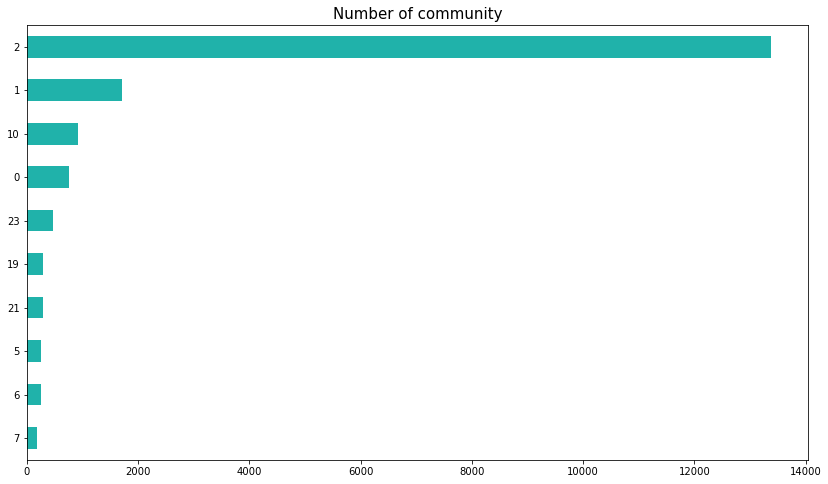

In [94]:
val = pd.Series(community)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:10].plot(kind='barh', color='lightseagreen', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of community', fontsize=15)
ax.invert_yaxis()
plt.show()